In [5]:
import matplotlib.pyplot as plt
import csv
import numpy as np

from matplotlib.lines import Line2D

In [14]:
param = [(-73,1800,7),(-80,20*60,7),(-83,15*60,7),(-87,10*60,7),(-91 ,5*60,7)]
Y_i = 10
max_time_quar = 10
### Ema
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_memory7/"
#name_file = "DTU_memory7_fig6_Q_nb_08"
#memory 10 days
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_memory10/"
#name_file = "DTU_memory10_fig6_Q_nb"

### Giulia
# adoption
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/adoption_60percent/"
#name_file = "DTU_adoptation_60_fig6_Q_nb"
# adoption
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/adoption_80percent/"
#name_file = "DTU_adoptation_80_fig6_Q_nb"
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_lowR0/"
#name_file = "DTU_lowR0_fig6_Q_nb"

#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_adopt80_lowR0/"
#name_file = "DTU_adop80_lowR0_fig6_Q_nb"
#only_10 = True


data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_low_memory_4days/results_low_memory/"
name_file = "DTU_memory_low_4gg_fig6_Q_nb"

### Antonio
# second order
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_second_order_Q_nb/"
#name_file = "DTU_second_order_fig6_Q_nb"




name_file = "Q_nb/"+name_file
#for eps_I in [0.01,0.2,0.5,0.8,1.0]:

In [15]:
act_infs = []
quar_is_s = []
for eps_I in [0.8]:
    for filter_rssi,filter_duration,memory_contacts in param:
        memory_contacts = 4
            # active infected
        fileName = data_set+'actInfs_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        act_infs.append(load_file_DTU(fileName))
        #fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        #quar = load_file_DTU(fileName)
        fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        quar_is_s.append(load_file_DTU(fileName))
        
        colors = ["#2CA02C","#FFD700","#FF7F0E","#FF0000","#A52A2A"]
days = np.arange(0,(len(act_infs[0][0])*300)/(24*3600)-(300/(3600*24)),300/(3600*24))
plt.rcParams.update({'font.size': 12})

In [16]:
print(fileName)

/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_low_memory_4days/results_low_memory/quar_is_epsI0.8_initialInfect10_FilRSSI-91_FilDur300_memCont4_QuarTime10.csv


In [17]:
# prendi solo prime 10
if (only_10 == True):
    new_ai = []
    new_is = []
    for p in range(5):
        new_ai.append(act_infs[p][0:10])
        new_is.append(quar_is_s[p][0:10])
    
    quar_is_s = new_is
    act_infs = new_ai

NameError: name 'only_10' is not defined

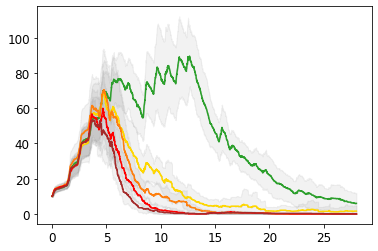

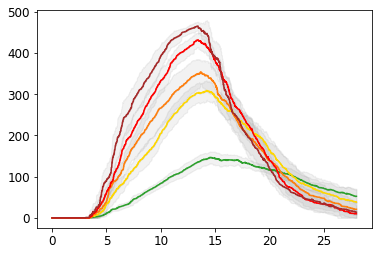

In [18]:

alpha = 0.1
#plt.ylim((-10,510))
for i in range(len(act_infs)):
    plot_avg_std(act_infs[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FN.pdf", bbox_inches = 'tight')
plt.show()

for i in range(len(quar_is_s)):
    plot_avg_std(quar_is_s[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FP.pdf", bbox_inches = 'tight')
plt.show()

In [12]:
def plot_avg_std(data,days,alpha,color,color2,line):
    data_mean = np.mean(data,0)
    data_std = np.std(data,0)
    length = range(len(data_mean))
    diff_a = data_mean - data_std
    diff_a = [max(0,x) for x in diff_a]
    plt.fill_between(days,data_mean+data_std,data_mean,color=color2,alpha=alpha)
    plt.fill_between(days,diff_a,data_mean,color=color2,alpha=alpha)
    plt.plot(days,data_mean,line,color=color,label="infec")

In [4]:
def load_file_socio(fileName):
    
    with open(fileName, 'r') as csvfile:
        reader = csv.reader(csvfile,delimiter=",")
        res_lists = []
        for i in reader:
            for j in i:
                res_lists.append(j)

    new_res_lists = []
    for i in res_lists:
        tmp = []
        for j in i[1:-1].split(','):
            tmp.append(float(j))
        new_res_lists.append(tmp)
    return(new_res_lists)


def load_file_DTU(fileName):
    with open(fileName, 'r') as csvfile:
        reader = csv.reader(csvfile)
        res_lists = [[e for e in r] for r in reader]
        new_res_lists = []
        for res_l in res_lists:
            tmp = []
            for r in res_l:
                tmp.append(float(r))
            new_res_lists.append(tmp)
    return(new_res_lists)

# Socio

## High

In [89]:
data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_socioPatterns_Q_nb//High_School/"
name_file = "Q_nb/Socio_High_fig6_Q_nb"

In [90]:
act_infs = []
quar_is_s = []
for eps_I in [0.8]:
    for filter_rssi,filter_duration,memory_contacts in param:
        
            # active infected
        fileName = data_set+'actInfs_epsI%.1f_initialInfect%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_duration,memory_contacts,max_time_quar)
        act_infs.append(load_file_socio(fileName))
        #fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        #quar = load_file_DTU(fileName)
        fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_duration,memory_contacts,max_time_quar)
        quar_is_s.append(load_file_socio(fileName))
        
        colors = ["#2CA02C","#FFD700","#FF7F0E","#FF0000","#A52A2A"]
#days = np.arange(0,(len(act_infs[0][0])*300)/(24*3600)-(300/(3600*24)),300/(3600*24))
days = np.arange(0,(len(act_infs[0][0])*300)/(24*3600),300/(3600*24))
plt.rcParams.update({'font.size': 12})

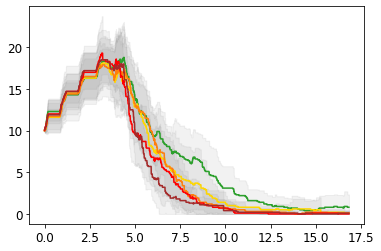

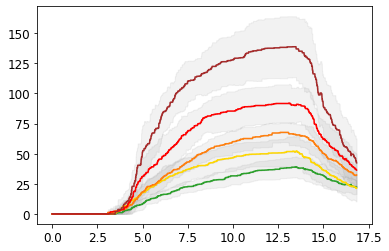

"\ncustom_lines = [Line2D([0], [0], color=colors[0], lw=4),\n                Line2D([0], [0], color=colors[1], lw=4),\n                Line2D([0], [0], color=colors[2], lw=4),\n                Line2D([0], [0], color=colors[3], lw=4),\n                Line2D([0], [0], color=colors[4], lw=4)]\n\nplt.legend(custom_lines, ['Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5'],\n           loc='center left', bbox_to_anchor=(1, 0.5))\n"

In [91]:

alpha = 0.1
#plt.ylim((-10,510))
for i in range(len(act_infs)):
    plot_avg_std(act_infs[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FN.pdf", bbox_inches = 'tight')
plt.show()

for i in range(len(quar_is_s)):
    plot_avg_std(quar_is_s[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FP.pdf", bbox_inches = 'tight')
plt.show()
'''
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4),
                Line2D([0], [0], color=colors[4], lw=4)]

plt.legend(custom_lines, ['Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5'],
           loc='center left', bbox_to_anchor=(1, 0.5))
'''

# INvS

In [92]:
data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_socioPatterns_Q_nb//InVS15/"
name_file = "Q_nb/Socio_InVS15_fig6_Q_nb"

act_infs = []
quar_is_s = []
for eps_I in [0.8]:
    for filter_rssi,filter_duration,memory_contacts in param:
        
            # active infected
        fileName = data_set+'actInfs_epsI%.1f_initialInfect%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_duration,memory_contacts,max_time_quar)
        act_infs.append(load_file_socio(fileName))
        #fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        #quar = load_file_DTU(fileName)
        fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_duration,memory_contacts,max_time_quar)
        quar_is_s.append(load_file_socio(fileName))
        
        colors = ["#2CA02C","#FFD700","#FF7F0E","#FF0000","#A52A2A"]
days = np.arange(0,(len(act_infs[0][0])*300)/(24*3600)-(300/(3600*24)),300/(3600*24))
plt.rcParams.update({'font.size': 12})

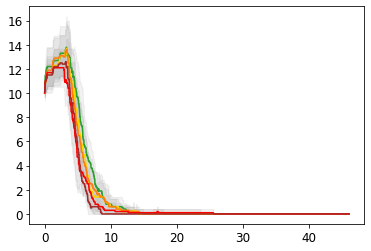

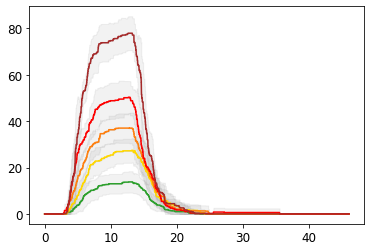

"\ncustom_lines = [Line2D([0], [0], color=colors[0], lw=4),\n                Line2D([0], [0], color=colors[1], lw=4),\n                Line2D([0], [0], color=colors[2], lw=4),\n                Line2D([0], [0], color=colors[3], lw=4),\n                Line2D([0], [0], color=colors[4], lw=4)]\n\nplt.legend(custom_lines, ['Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5'],\n           loc='center left', bbox_to_anchor=(1, 0.5))\n"

In [93]:

alpha = 0.1
#plt.ylim((-10,510))
for i in range(len(act_infs)):
    plot_avg_std(act_infs[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FN.pdf", bbox_inches = 'tight')
plt.show()

for i in range(len(quar_is_s)):
    plot_avg_std(quar_is_s[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FP.pdf", bbox_inches = 'tight')
plt.show()

# Param 2

In [28]:
param = [(-69,600,7),(-91,1800,7)]
Y_i = 10
max_time_quar = 10
### Ema
data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_memory7/"
name_file = "DTU_memory7_fig6_Q_nb"

#memory 10 days
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_alain_memory10/"
#name_file = "DTU_memory10_fig6_Q_nb"
#only_10 = False
### Giulia
# adoption
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/adoption_60percent/"
#name_file = "DTU_adoptation_60_fig6_Q_nb"
#only_10 = False
# adoption
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/adoption_80percent/"
#name_file = "DTU_adoptation_80_fig6_Q_nb"
#only_10 = False
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_lowR0/"
#name_file = "DTU_lowR0_fig6_Q_nb"
#only_10 = False

#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_adopt80_lowR0/"
#name_file = "DTU_adop80_lowR0_fig6_Q_nb"
#only_10 = True

### Antonio
# second order
#data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_second_order_Q_nb/"
#name_file = "DTU_second_order_fig6_Q_nb"
only_10 = False

name_file = "Q_nb/p2/"+name_file
#for eps_I in [0.01,0.2,0.5,0.8,1.0]:

In [29]:
act_infs = []
quar_is_s = []
for eps_I in [0.8]:
    for filter_rssi,filter_duration,memory_contacts in param:
        #memory_contacts = 10
            # active infected
        fileName = data_set+'actInfs_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        act_infs.append(load_file_DTU(fileName))
        #fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        #quar = load_file_DTU(fileName)
        fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        quar_is_s.append(load_file_DTU(fileName))
        
        colors = ["#6F13B0","#F12EFF"]
days = np.arange(0,(len(act_infs[0][0])*300)/(24*3600)-(300/(3600*24)),300/(3600*24))
plt.rcParams.update({'font.size': 12})

In [30]:
# prendi solo prime 10
if (only_10 == True):
    new_ai = []
    new_is = []
    for p in range(2):
        new_ai.append(act_infs[p][0:10])
        new_is.append(quar_is_s[p][0:10])
    
    quar_is_s = new_is
    act_infs = new_ai

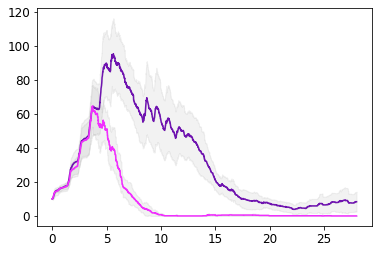

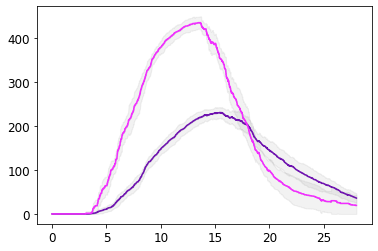

In [31]:

alpha = 0.1
#plt.ylim((-10,510))
for i in range(len(act_infs)):
    plot_avg_std(act_infs[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FN.pdf", bbox_inches = 'tight')
plt.show()

for i in range(len(quar_is_s)):
    plot_avg_std(quar_is_s[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FP.pdf", bbox_inches = 'tight')
plt.show()

# Socio

In [83]:
param = [(-70,600,7),(-91,1800,7)]
Y_i = 10
max_time_quar = 10

data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_socioPatterns_Q_nb//High_School/"
name_file = "Q_nb/p2/Socio_High_fig6_Q_nb"

In [84]:
act_infs = []
quar_is_s = []
for eps_I in [0.8]:
    for filter_rssi,filter_duration,memory_contacts in param:
        
            # active infected
        fileName = data_set+'actInfs_epsI%.1f_initialInfect%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_duration,memory_contacts,max_time_quar)
        act_infs.append(load_file_socio(fileName))
        #fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        #quar = load_file_DTU(fileName)
        fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_duration,memory_contacts,max_time_quar)
        quar_is_s.append(load_file_socio(fileName))
        
        colors = ["#6F13B0","#F12EFF"]
#days = np.arange(0,(len(act_infs[0][0])*300)/(24*3600)-(300/(3600*24)),300/(3600*24))
days = np.arange(0,(len(act_infs[0][0])*300)/(24*3600),300/(3600*24))
plt.rcParams.update({'font.size': 12})

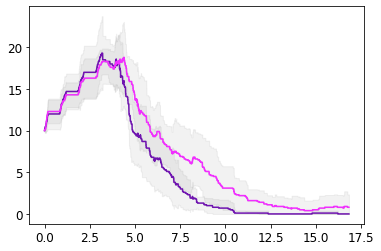

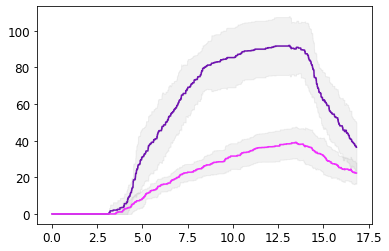

In [85]:

alpha = 0.1
#plt.ylim((-10,510))
for i in range(len(act_infs)):
    plot_avg_std(act_infs[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FN.pdf", bbox_inches = 'tight')
plt.show()

for i in range(len(quar_is_s)):
    plot_avg_std(quar_is_s[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FP.pdf", bbox_inches = 'tight')
plt.show()

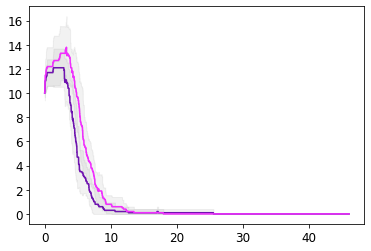

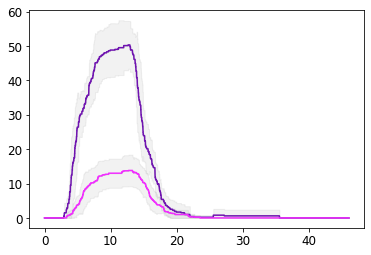

In [86]:
data_set = "/home/antonio/Desktop/Dottorato/COVID/eliminami/data/Q_nb/results_socioPatterns_Q_nb//InVS15/"
name_file = "Q_nb/p2/Socio_InVS15_fig6_Q_nb"

act_infs = []
quar_is_s = []
for eps_I in [0.8]:
    for filter_rssi,filter_duration,memory_contacts in param:
        
            # active infected
        fileName = data_set+'actInfs_epsI%.1f_initialInfect%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_duration,memory_contacts,max_time_quar)
        act_infs.append(load_file_socio(fileName))
        #fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilRSSI%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_rssi,filter_duration,memory_contacts,max_time_quar)
        #quar = load_file_DTU(fileName)
        fileName = data_set+'quar_is_epsI%.1f_initialInfect%d_FilDur%d_memCont%d_QuarTime%d.csv'%(eps_I,Y_i,filter_duration,memory_contacts,max_time_quar)
        quar_is_s.append(load_file_socio(fileName))
        
        colors = ["#6F13B0","#F12EFF"]
days = np.arange(0,(len(act_infs[0][0])*300)/(24*3600)-(300/(3600*24)),300/(3600*24))
plt.rcParams.update({'font.size': 12})



alpha = 0.1
#plt.ylim((-10,510))
for i in range(len(act_infs)):
    plot_avg_std(act_infs[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FN.pdf", bbox_inches = 'tight')
plt.show()

for i in range(len(quar_is_s)):
    plot_avg_std(quar_is_s[i],days,alpha,colors[i],"gray",line="-")
plt.savefig(name_file+"FP.pdf", bbox_inches = 'tight')
plt.show()